# Classification

Rank | Classifier | Options | Dataset | Score
--- | --- | --- | ---| ---
1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
3 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
3 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
6 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
6 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
6 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
9 |RandomForest | `n_estimators=90` | Full | `0.942708333333`
10|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full         = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_clean_manual.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
for x in range(4):
    for y in range(4):
        columns.append('_'.join(['weight', str(x), str(y)]))
        
def scale(scaler):
    return pd.DataFrame(scaler.fit_transform(data_clean_manual[columns]), columns=columns)

### MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(MinMaxScaler())
minmaxscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.386221,0.366942,0.454885,0.431804,0.469217,0.467661,0.105469,0.658203,0.600895,0.065549,...,0.090131,0.488843,0.578027,0.211257,0.042008,0.591260,0.620475,0.122538,0.379688,4.532813
std,0.187824,0.128599,0.184747,0.166394,0.139196,0.182193,0.164724,0.212742,0.242885,0.136131,...,0.145907,0.301028,0.222586,0.223395,0.093925,0.222449,0.256480,0.181193,0.584767,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253482,0.279412,0.315569,0.310002,0.378048,0.344453,0.000000,0.562500,0.453125,0.000000,...,0.000000,0.234375,0.437500,0.000000,0.000000,0.484375,0.515625,0.000000,0.000000,2.000000
50%,0.341226,0.352941,0.429087,0.422310,0.462067,0.459344,0.000000,0.703125,0.625000,0.000000,...,0.000000,0.500000,0.593750,0.161290,0.000000,0.625000,0.687500,0.036364,0.000000,5.000000
75%,0.481894,0.455882,0.569182,0.539510,0.552328,0.562653,0.181818,0.812500,0.781250,0.064516,...,0.153846,0.750000,0.734375,0.354839,0.034483,0.734375,0.796875,0.181818,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000


### RobustScaler

In [5]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(RobustScaler())
robustscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.196993,0.079340,1.017201e-01,4.136941e-02,4.102775e-02,0.038119,0.580078,-0.179688,-0.073462,1.016016,...,0.585851,-0.021638,-0.052961,0.140814,1.218229,-0.134961,-0.238310,0.473958,0.379688,4.532813
std,0.822303,0.728725,7.284580e-01,7.250003e-01,7.986912e-01,0.834985,0.905983,0.850967,0.740222,2.110030,...,0.948393,0.583812,0.749764,0.629568,2.723832,0.889798,0.911930,0.996559,0.584767,2.868122
min,-1.493902,-2.000000,-1.691895e+00,-1.840064e+00,-2.651279e+00,-2.105159,0.000000,-2.812500,-1.904762,0.000000,...,0.000000,-0.969697,-2.000000,-0.454545,0.000000,-2.500000,-2.444444,-0.200000,0.000000,0.000000
25%,-0.384146,-0.416667,-4.476046e-01,-4.893416e-01,-4.820904e-01,-0.526539,0.000000,-0.562500,-0.523810,0.000000,...,0.000000,-0.515152,-0.526316,-0.454545,0.000000,-0.562500,-0.611111,-0.200000,0.000000,2.000000
50%,0.000000,0.000000,7.274827e-16,-7.901665e-16,5.943054e-16,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.615854,0.583333,5.523954e-01,5.106584e-01,5.179096e-01,0.473461,1.000000,0.437500,0.476190,1.000000,...,1.000000,0.484848,0.473684,0.545455,1.000000,0.437500,0.388889,0.800000,1.000000,7.000000
max,2.884146,3.666667,2.251112e+00,2.517077e+00,3.086590e+00,2.477812,5.500000,1.187500,1.142857,15.500000,...,6.500000,0.969697,1.368421,2.363636,29.000000,1.500000,1.111111,5.300000,2.000000,9.000000


### QuantileTransformer

In [6]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(QuantileTransformer())
quantiletransformed.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,...,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000
mean,4.999974e-01,5.000066e-01,4.999996e-01,5.000034e-01,4.999984e-01,4.999982e-01,3.476723e-01,5.000201e-01,4.999338e-01,3.040906e-01,...,3.541981e-01,4.985454e-01,5.000751e-01,4.382782e-01,2.425205e-01,4.997604e-01,5.000615e-01,3.952468e-01,0.379688,4.532813
std,2.888959e-01,2.887092e-01,2.888972e-01,2.889019e-01,2.888986e-01,2.888992e-01,3.955703e-01,2.889265e-01,2.891776e-01,3.990423e-01,...,3.943233e-01,2.916285e-01,2.889566e-01,3.562232e-01,3.891705e-01,2.893259e-01,2.903445e-01,3.811212e-01,0.584767,2.868122
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.000000,0.000000
25%,2.502503e-01,2.577578e-01,2.497667e-01,2.500801e-01,2.501045e-01,2.499021e-01,1.000000e-07,2.537538e-01,2.567568e-01,1.000000e-07,...,1.000000e-07,2.512513e-01,2.532533e-01,1.000000e-07,1.000000e-07,2.422422e-01,2.517518e-01,1.000000e-07,0.000000,2.000000
50%,5.010010e-01,4.809810e-01,4.998480e-01,5.000105e-01,4.999102e-01,4.999490e-01,1.000000e-07,5.080080e-01,4.894895e-01,1.000000e-07,...,1.000000e-07,5.010010e-01,4.889890e-01,5.055055e-01,1.000000e-07,5.100100e-01,5.025025e-01,5.200200e-01,0.000000,5.000000
75%,7.507508e-01,7.597598e-01,7.500140e-01,7.501820e-01,7.502810e-01,7.502003e-01,7.677678e-01,7.492492e-01,7.472472e-01,7.477477e-01,...,7.612613e-01,7.492492e-01,7.447447e-01,7.392392e-01,7.467467e-01,7.482482e-01,7.567568e-01,7.462462e-01,1.000000,7.000000
max,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,...,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,2.000000,9.000000


#### Slimmer Dataset

In [7]:
slim_columns = ['num_holes', 'label']
for x in range(4):
    for y in range(4):
        slim_columns.insert(0, '_'.join(['weight', str(x), str(y)]))
data_slim_scaled = minmaxscaled[slim_columns]
data_slim_scaled[:3]

,weight_3_3,weight_3_2,weight_3_1,weight_3_0,weight_2_3,weight_2_2,weight_2_1,weight_2_0,weight_1_3,weight_1_2,weight_1_1,weight_1_0,weight_0_3,weight_0_2,weight_0_1,weight_0_0,num_holes,label
0,0.090909,0.703125,0.718750,0.034483,0.193548,0.843750,0.859375,0.333333,0.000000,0.000000,0.578125,0.366667,0.000000,0.000000,0.593750,0.000000,1,6
1,0.000000,0.703125,0.562500,0.000000,0.000000,0.531250,0.593750,0.000000,0.027778,0.609375,0.750000,0.300000,0.032258,0.796875,0.593750,0.136364,2,8
2,0.000000,0.406250,0.953125,0.448276,0.000000,0.453125,1.000000,0.384615,0.055556,0.937500,0.734375,0.000000,0.225806,0.875000,0.515625,0.000000,0,1


## Splitting the dataset

In [8]:
def split_data(data, split):
    border = int(len(data) * split)
    train_data = data[:border]
    test_data = data[border:]

    assert len(train_data) + len(test_data) == len(data), "Invalid split!"

    X_train = train_data.iloc[:,:-1]
    Y_train = train_data.iloc[:,-1]

    X_test = test_data.iloc[:,:-1]
    Y_test = test_data.iloc[:,-1]
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split_data(data_slim_scaled, .9)

## Try Random Forest Classifier

In [9]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print 'N_E:', n_e, 'Score:', score
print 'Top:', top_rf

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


N_E: 2 Score: 0.713541666667
N_E: 3 Score: 0.828125
N_E: 4 Score: 0.859375
N_E: 5 Score: 0.885416666667
N_E: 7 Score: 0.921875
N_E: 9 Score: 0.927083333333
N_E: 11 Score: 0.932291666667
N_E: 20 Score: 0.942708333333
N_E: 22 Score: 0.947916666667
Top: (22, 0.94791666666666663)


## Try Support Vector Machine

In [10]:
# SVM
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)
print 'Score:', svc.score(X_test, Y_test)

Score: 0.942708333333


### Finding the optimal C value

In [11]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print 'Top:', top

Top: (3.6000000000000001, 0.96354166666666663)


Max: 0.963541666667


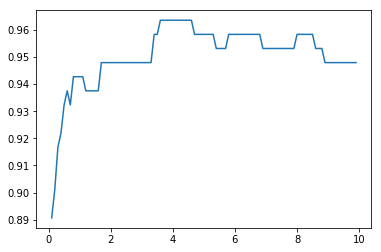

In [12]:
print 'Max:', scores.max()
plt.plot(Cs, scores)